# Digital Signal Image Processing - Assignment 3

**Riccardo Caprile 4370774**

# First Part : Image Processing Basics

- Generate a synthetic image I of size 200x200 with a black background containing 3
squares of side 10, 30, 50 pixels the position of which (I’m referring to both the row
and column components of the top-left vertex) is sampled uniformly in the range
[0,140].

Each of the squares will have a constant brightness, sampled uniformly in
the range [50,255]

- Rotate the image around its center (that is the point of coordinates (100,100)) of an
angle $\theta$ sampled uniformly in the range [10, 80] --> $I_r$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,6)

import skimage.draw
from skimage.transform import rotate
import cv2

**Let's create the image I of size 200x200 with a black background**

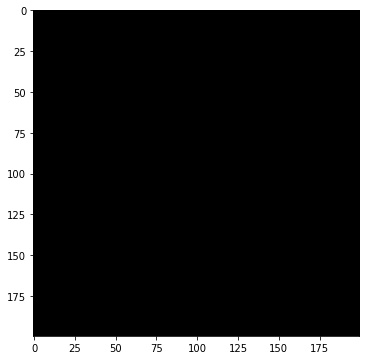

In [2]:
#Let's create the image I of size 200x200 with a black background

I = np.zeros((200,200),dtype=np.uint8)

plt.imshow(I,cmap = "gray")

**The next step is to sample uniformly the positions (both row and column components of the top left vertex) of each of the three rectangles and their brightness.**

In [3]:
#row and column position of the top left vertex

v1x , v1y = np.random.randint(0,140,2)
v2x , v2y = np.random.randint(0,140,2)
v3x , v3y = np.random.randint(0,140,2)

#Brightness sampling for each square

brightness1 = np.random.randint(50, 255)
brightness2 = np.random.randint(50, 255)
brightness3 = np.random.randint(50, 255)

**Now we need to draw the three rectangles**

For drawing the rectangles we just need increase the x and y axis by 10,30 and 50 pixels to the sampled starting position

Text(0.5, 1.0, 'Image with squares')

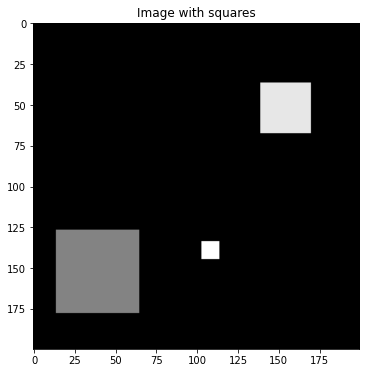

In [4]:
#10x10
row, column = skimage.draw.rectangle((v1x, v1y), ((v1x + 10), (v1y + 10)))
I[row, column] = brightness1 #all pixels of that rectangle will have brightness1

#30x30 square
row, column = skimage.draw.rectangle((v2x, v2y), ((v2x + 30), (v2y + 30)))
I[row, column] = brightness2 #all pixels of that rectangle will have brightness2

#50x50 Square
row, column = skimage.draw.rectangle((v3x, v3y), ((v3x + 50), (v3y + 50)))
I[row, column] = brightness3 #all pixels of that rectangle will have brightness3

#Let's visualiza the image
plt.imshow(I, cmap='gray')
plt.title('Image with squares')


**The next step of this first part is the Rotation**

We need to rotate the image around its center of an angle $\theta$ sampled uniformly

In [5]:
theta = np.random.uniform(10,80)
center = (100,100) #center of the image

print("Angle of rotation =" ,theta)

Angle of rotation = 32.47760477724225


The skimage library provides already a function $rotate$ that rotate image by a certain angle , in this case we use $\theta$ around its center.

Basically , the coordinates x and y of a pixel are changed using a simple transformation like : $q_1 = p_1 cos\theta + p_2 sin\theta$ and $q_2 = -p_1 sin\theta + p_2 cos\theta$

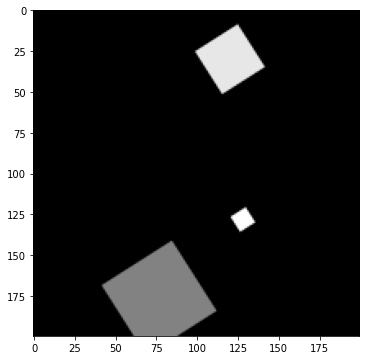

In [6]:
#Let's rotate and visualize the image
I_r = rotate(I, theta)
#Normalize
I_r = I_r / I_r.max() * 255
#cast to uint8
I_r = np.clip(I_r, 0, 255).astype(np.uint8)
plt.imshow(I_r, cmap='gray')

# Second Part :2D DFT

 
 
 In this second part of the assignment we need to : 
 
 - compute the DFT of the two images , $I$ and $I_r$, and visualize them in the appropriate way (meaning , using the appropriate shifting) side by side. 
    
Comment what you obtain.

**So , now we can compute the 2D DFT for the two images , using numpy library as we have done for the Signal Assignment**

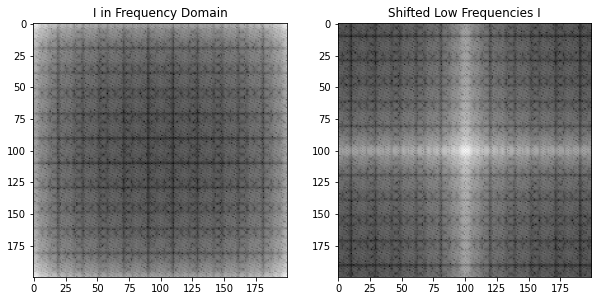

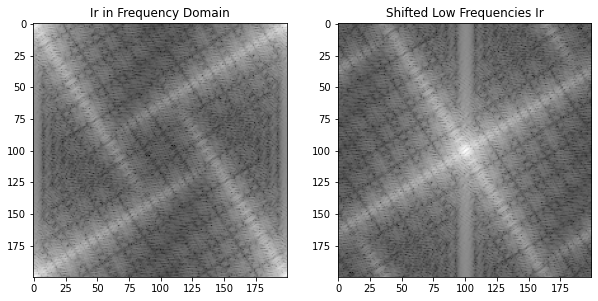

In [7]:
#We need to use the 2-dimensional fourier transform function 

I_dft = np.fft.fft2(I)
I_r_dft = np.fft.fft2(I_r)

#We need to compute the shifted version of both images to shift the zero frequency component to the center of the spectrum

I_dft_shifted = np.fft.fftshift(I_dft)
I_r_dft_shifted = np.fft.fftshift(I_r_dft)

#At this point we can plot them and visualize them 

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('I in Frequency Domain')
plt.imshow(np.log1p(np.abs(I_dft)), cmap='gray')


plt.subplot(122)
plt.title('Shifted Low Frequencies I')
plt.imshow(np.log1p(np.abs(I_dft_shifted)), cmap='gray')

plt.show()


plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Ir in Frequency Domain')
plt.imshow(np.log1p(np.abs(I_r_dft)), cmap='gray')


plt.subplot(122)
plt.title('Shifted Low Frequencies Ir')
plt.imshow(np.log1p(np.abs(I_r_dft_shifted)), cmap='gray')

plt.show()





The 2D DFT computes the spectrum of a 2D image.

In order to apply DFT , we must consider the image as a part of its periodic expasion.

The spectrum repeats itself endlessly in horizontal and vertical directions.

In order to visualize one replica of the DFT we need an appropriate frequency shift that will take zero-frequency component at the centre of the spectrum. Numpy provides a function for shifting (fftshift()).

In addition to this , it is possible to see that the spectrum is sensitive to rotation because the 2D DFT rotates by the same angle $\theta$ used before.

# Third Part : Image Filtering

In the third part of the assignment we need to : 

 - Implement high pass / enhancement filtering procedures , in space and in frequencies. Make appropriate design choices in the two cases (that is , select appropriate filters for Fourier and for space filtering).
 
 - Use the results from the step above to obtain a coarse edge map associated with images $I$ and $I_r$.
 
 - Comment what you obtain

**High Pass Filter** -> This filter let pass only the high frequencies, dropping the low frequencies.

Fine details in images are associated with high frequency components.

High pass filters are the reverse of low pass filters so : $H_{hp}(u,v) = 1 - H_{lp}(u,v)$

**Space Filtering**

Two steps to follow for space filtering : 1) We have to select an appropriate filter $h(x,y)$, 2) Convoleve the image in the space domain with the filter defined before. The filtered image is obtained as $g[x,y] = (f * k)[x,y]$

**Laplacian Filter**

I've decided to implement as a space filter the Laplacian filter. It is used to measure the second spatial derivative of an image. 

It is a filter used for edge detection (zero-crossing algorithms) , image sharpening.

The Laplacian filter is defined  as : $\nabla^{2}f =\frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2}$, sum of derivatives (which are linear) is linear and can be represented through an appropriate kernel.

Let's implement it.

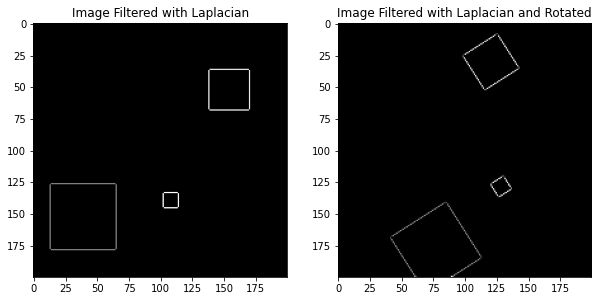

In [8]:
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

I_space_filtered = cv2.filter2D(I, -1, kernel)
I_r_space_filtered = cv2.filter2D(I_r, -1, kernel)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Image Filtered with Laplacian')
plt.imshow(I_space_filtered, cmap='gray')


plt.subplot(122)
plt.title('Image Filtered with Laplacian and Rotated')
plt.imshow(I_r_space_filtered, cmap='gray')



**Fourier Filtering**

Now we can talk about Fourier filtering.

To filter an image in the frequency domain we have to follow some steps : 

- Compute the DFT of the image $F(u,v)$
- Select an appropriate filter H (or filter transfer function)
- Multiply $F(u,v)$ by a filter function $H(u,v)$ : $G(u,v) = H(u,v)F(u,v)$
- Compute the inverse DFT of $G(u,v)$

Firstly , i've implemented an Ideal Low Pass filter H(u,v) , then computed the Ideal High Pass Filter H(u,v) = 1 - H(u,v)

The Ideal Low Pass filter algorithm is : $D(u,v) = [(u-M/2)^2 + (v-N/2)^2]^{1/2}$ as distance

$H(u,v) = 1 $ if $ D(u,v) <= D_0 , 0$ if $D(u,v) > D_0$

$D_0$ cutoff frequency

M = rows and N = columns

Text(0.5, 1.0, 'Ideal Low Pass Filter')

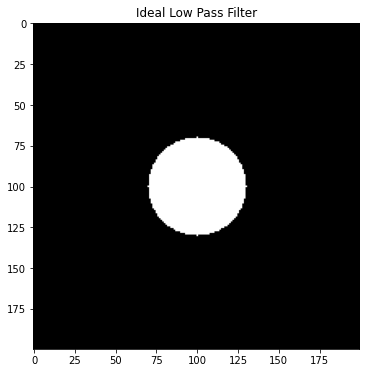

In [9]:
M , N = I.shape

H_l = np.zeros((M,N) , dtype = np.float32)
D_0 = 30

for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D_0:
            H_l[u,v] = 1
        else:
            H_l[u,v] = 0
            
plt.imshow(H_l,cmap = "gray")
plt.title("Ideal Low Pass Filter")

The filter results depends on the choice of the cutoff frequency $D_0$ , if it is a small value most of the high frequencies will be dropped and so the image will be very smoothed.

On the other hand , if the value is very high most of the frequencies pass and so the image will be perfectly reconstructed.

Now it's trivial to implement the **Ideal High Pass Filter** because it is defined as : $H(u,v) = 1 - H(u,v)$

Text(0.5, 1.0, 'Ideal High Pass Filter')

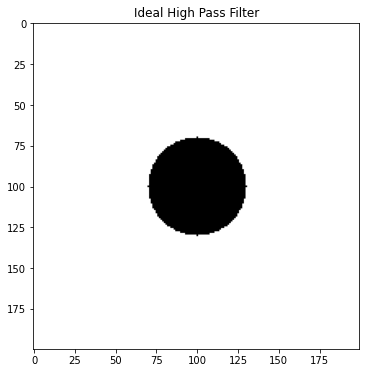

In [10]:
H_h = 1 - H_l

plt.imshow(H_h,cmap = "gray")
plt.title("Ideal High Pass Filter")

Now we can test our filter with the DFT shifted of the starting image

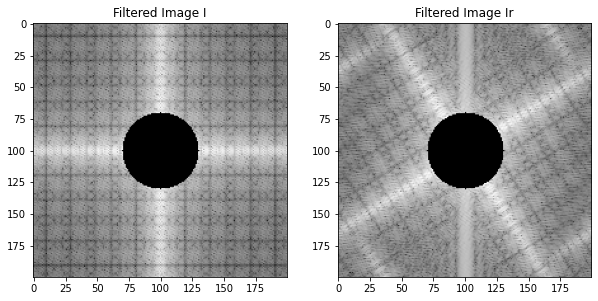

In [15]:
Filtered_I_dft_shifted = I_dft_shifted * H_h
Filtered_I_r_dft_shifted = I_r_dft_shifted * H_h



plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(np.log1p(np.abs(Filtered_I_dft_shifted)), cmap='gray')
plt.title('Filtered Image Shifted I')

plt.subplot(122)
plt.imshow(np.log1p(np.abs(Filtered_I_r_dft_shifted)), cmap='gray')
plt.title('Filtered Image Shifted I_r')
plt.show()

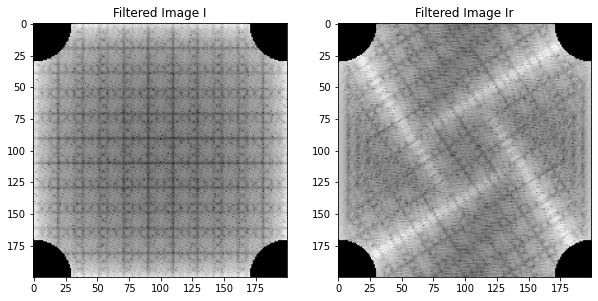

In [16]:
#Let's shift back the frequencies


Inv_Filtered_I_dft_shifted = np.fft.ifftshift(Filtered_I_dft_shifted)
Inv_Filtered_I_r_dft_shifted = np.fft.ifftshift(Filtered_I_r_dft_shifted)



plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(np.log1p(np.abs(Inv_Filtered_I_dft_shifted)), cmap='gray')
plt.title('Filtered Image I')

plt.subplot(122)
plt.imshow(np.log1p(np.abs(Inv_Filtered_I_r_dft_shifted)), cmap='gray')
plt.title('Filtered Image Ir')
plt.show()

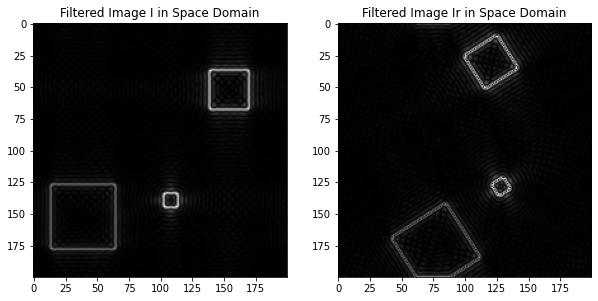

In [18]:
#Inverse Fourier Transform

I_Filterd = np.abs(np.fft.ifft2(Inv_Filtered_I_dft_shifted))
I_r_Filtered = np.abs(np.fft.ifft2(Inv_Filtered_I_r_dft_shifted))


plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(I_Filterd, cmap='gray')
plt.title('Filtered Image I in Space Domain')

plt.subplot(122)
plt.imshow(I_r_Filtered, cmap='gray')
plt.title('Filtered Image I_r in Space Domain')
plt.show()

Then we want to implement the Gaussian High Pass Filter before , and the Gaussian Low Pass Filter as we have done before.

The Gaussian Low Pass filter is defined as : $H(u,v) = e^{-D^2(u,v)/2D^2_0}$

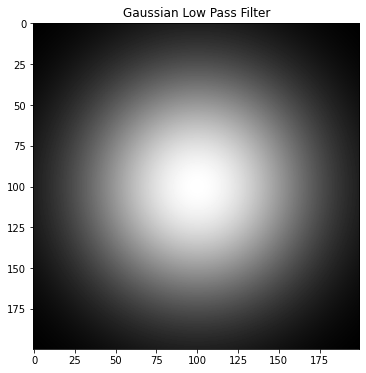

In [23]:
M, N = I.shape
H_l = np.zeros((M,N), dtype = np.float32)
D0 = 50

for u in range(M):
    for v in range(M):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H_l[u,v] = np.exp(-((D**2)/(2*(D0**2))))

plt.imshow(H_l, cmap = 'gray')
plt.title('Gaussian Low Pass Filter')
plt.show()

The Gaussian High Pass Filter is defined as : $H(u,v) = 1 - H(u,v)$

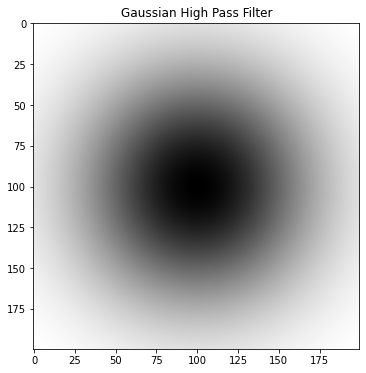

In [24]:
H_h = 1 - H_l

plt.imshow(H_h, cmap = 'gray')
plt.title('Gaussian High Pass Filter')
plt.show()

We now follow the same steps as before, using the Gaussian High Pass Filter

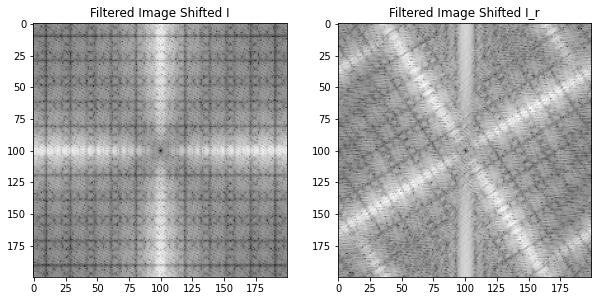

In [25]:
Filtered_I_dft_shifted = I_dft_shifted * H_h
Filtered_I_r_dft_shifted = I_r_dft_shifted * H_h



plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(np.log1p(np.abs(Filtered_I_dft_shifted)), cmap='gray')
plt.title('Filtered Image Shifted I')

plt.subplot(122)
plt.imshow(np.log1p(np.abs(Filtered_I_r_dft_shifted)), cmap='gray')
plt.title('Filtered Image Shifted I_r')
plt.show()

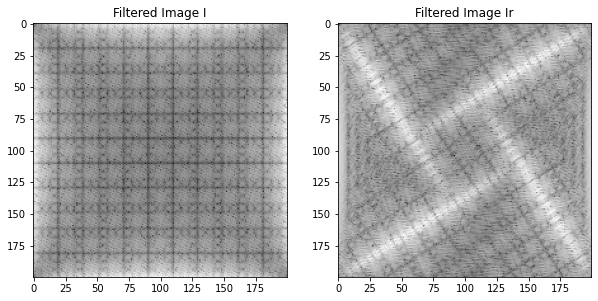

In [26]:
#Let's shift back the frequencies


Inv_Filtered_I_dft_shifted = np.fft.ifftshift(Filtered_I_dft_shifted)
Inv_Filtered_I_r_dft_shifted = np.fft.ifftshift(Filtered_I_r_dft_shifted)



plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(np.log1p(np.abs(Inv_Filtered_I_dft_shifted)), cmap='gray')
plt.title('Filtered Image I')

plt.subplot(122)
plt.imshow(np.log1p(np.abs(Inv_Filtered_I_r_dft_shifted)), cmap='gray')
plt.title('Filtered Image Ir')
plt.show()

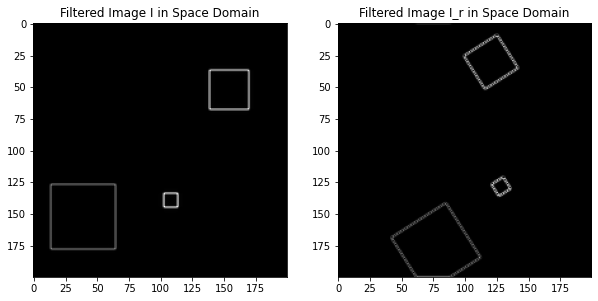

In [27]:
#Inverse Fourier Transform

I_Filterd = np.abs(np.fft.ifft2(Inv_Filtered_I_dft_shifted))
I_r_Filtered = np.abs(np.fft.ifft2(Inv_Filtered_I_r_dft_shifted))


plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(I_Filterd, cmap='gray')
plt.title('Filtered Image I in Space Domain')

plt.subplot(122)
plt.imshow(I_r_Filtered, cmap='gray')
plt.title('Filtered Image I_r in Space Domain')
plt.show()

# Some more comments


All the result obtained with the High Pass filters to the starting image and the rotated image are **coarse edge maps**. A coarse edge map is an image in whihch there is a simplified representation of edges in the image. Basically we have two values in the images pixels in black and pixels in white. The white pixels indicate the presence of an edge , whereas the black ones the absence of an edge. The objective of this representation is to reduce the complexity of the image and preserve the important features like corners and edges.

A coarse edge map is based on the concept of Edge Detection, which highlight sharp changes in image brightness and capture important changes of intensity in the images.

All the results obtained above are valid examples of coarse edge maps.

We can add one more thing about the result obtained. If the brightness of the rectangle tends to be white , the contrast with the background is higher and so the edges of that particular rectangle will be more visible in the filtered image.

On the other hand, if the brightness of the rectangle is similar to the background, in the coarse edge map the edge will be less visible.

There are more powerful algorithm for edge deteection. For example : The Sobel Filter